The data has been split into two groups:

training set (train.csv) test set (test.csv) The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

First we will work on the training data set.

In [1]:
# Importing the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings

In [2]:
train_data=pd.read_csv('D:/DATA SCIENCE/Kaggle/train.csv')

In [3]:
# Seeing the dataset
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Statistical description of the data
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
# Which columns have null values in them so that we may replace them
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So we find that the columns of Age, Cabin, & Embarked have null values in them. We need to replace them for the ease of analysis

In [7]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].median())

In [8]:
train_data['Age'].isnull().sum()

0

In [9]:
train_data['Cabin']=train_data['Cabin'].notnull().astype('int')
train_data['Cabin'].isnull().sum()

0

In [10]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
train_data['Embarked']=train_data['Embarked'].fillna(0)
train_data['Embarked'].isnull().sum()

0

In [12]:
# Name, Ticket, & Embarked may not have much bearing upon the survvial hence dropping those columns form the dataset
train_data=train_data.drop(['Name','Ticket','Embarked'],axis=1)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,1
4,5,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0
887,888,1,1,female,19.0,0,0,30.0000,1
888,889,0,3,female,28.0,1,2,23.4500,0
889,890,1,1,male,26.0,0,0,30.0000,1


In [13]:
# For analysis we have to convert the values of Sex column into binary format
train_data['Sex']=train_data['Sex'].map({'male':0,'female':1})
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,1
888,889,0,3,1,28.0,1,2,23.4500,0
889,890,1,1,0,26.0,0,0,30.0000,1


Now we will try to visulaize different columns with regards to the survival as this is what we have to predict for test data

% of Pclass 1 that survived is 62.96296296296296
% of Pclass 2 that survived is 47.28260869565217
% of Pclass 3 that survived is 24.236252545824847


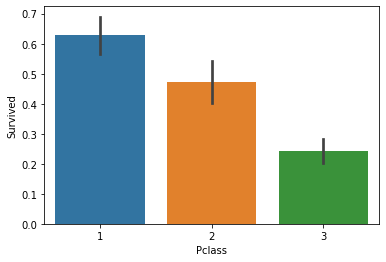

In [17]:
sns.barplot(x='Pclass',y='Survived',data=train_data)
print('% of Pclass 1 that survived is',train_data['Survived'][train_data['Pclass']==1].value_counts(normalize=True)[1]*100)
print('% of Pclass 2 that survived is',train_data['Survived'][train_data['Pclass']==2].value_counts(normalize=True)[1]*100)
print('% of Pclass 3 that survived is',train_data['Survived'][train_data['Pclass']==3].value_counts(normalize=True)[1]*100)

So the max survival with respect to Pclass is from Pclass 1

% of males who survived 18.890814558058924
% of females who survived 74.20382165605095


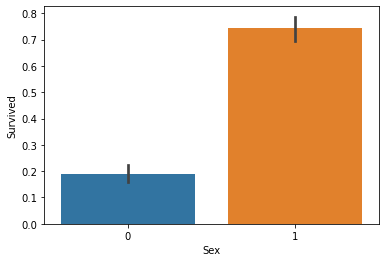

In [21]:
sns.barplot(x='Sex',y='Survived',data=train_data)
print('% of males who survived',train_data['Survived'][train_data['Sex']==0].value_counts(normalize=True)[1]*100)
print('% of females who survived',train_data['Survived'][train_data['Sex']==1].value_counts(normalize=True)[1]*100)

In [23]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

% of SibSp=0 who survived 34.53947368421053
% of SibSp=1 who survived 53.588516746411486
% of SibSp=2 who survived 46.42857142857143
% of SibSp=3 who survived 25.0
% of SibSp=4 who survived 16.666666666666664


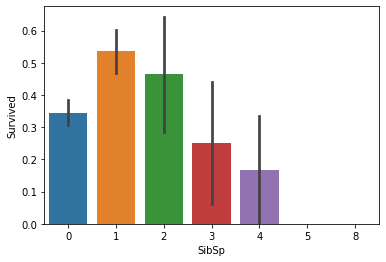

In [25]:
sns.barplot(x='SibSp',y='Survived',data=train_data)
print('% of SibSp=0 who survived',train_data['Survived'][train_data['SibSp']==0].value_counts(normalize=True)[1]*100)
print('% of SibSp=1 who survived',train_data['Survived'][train_data['SibSp']==1].value_counts(normalize=True)[1]*100)
print('% of SibSp=2 who survived',train_data['Survived'][train_data['SibSp']==2].value_counts(normalize=True)[1]*100)
print('% of SibSp=3 who survived',train_data['Survived'][train_data['SibSp']==3].value_counts(normalize=True)[1]*100)
print('% of SibSp=4 who survived',train_data['Survived'][train_data['SibSp']==4].value_counts(normalize=True)[1]*100)

There are no survivors for SibSp 5 & 8

In [26]:
train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

% of Parch=0 who survived 34.365781710914455
% of Parch=1 who survived 55.08474576271186
% of Parch=2 who survived 50.0
% of Parch=3 who survived 60.0
% of Parch=5 who survived 20.0


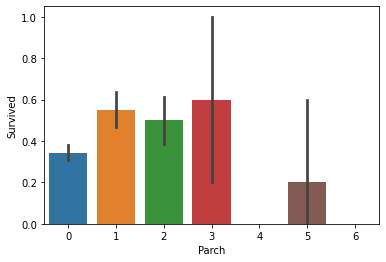

In [28]:
sns.barplot(x='Parch',y='Survived',data=train_data)
print('% of Parch=0 who survived',train_data['Survived'][train_data['Parch']==0].value_counts(normalize=True)[1]*100)
print('% of Parch=1 who survived',train_data['Survived'][train_data['Parch']==1].value_counts(normalize=True)[1]*100)
print('% of Parch=2 who survived',train_data['Survived'][train_data['Parch']==2].value_counts(normalize=True)[1]*100)
print('% of Parch=3 who survived',train_data['Survived'][train_data['Parch']==3].value_counts(normalize=True)[1]*100)
print('% of Parch=5 who survived',train_data['Survived'][train_data['Parch']==5].value_counts(normalize=True)[1]*100)

There are no survivors for Parch 4 & 6

% of Cabin=0 who survived 29.985443959243085
% of Cabin=1 who survived 66.66666666666666


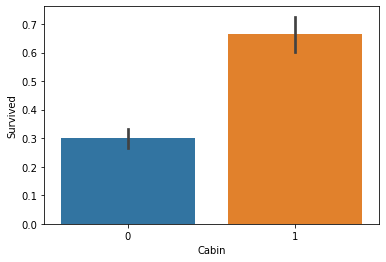

In [29]:
sns.barplot(x=train_data['Cabin'],y=train_data['Survived'])
print('% of Cabin=0 who survived',train_data['Survived'][train_data['Cabin']==0].value_counts(normalize=True)[1]*100)
print('% of Cabin=1 who survived',train_data['Survived'][train_data['Cabin']==1].value_counts(normalize=True)[1]*100)

The percentage of survival of passengers whose Cabin data is available is 66.66% 

Now we will try to perform analysis on the test data with respect to survival. Through this we will build a model to predict the survival

In [30]:
x=train_data.drop(['Survived'],axis=1)
y=train_data['Survived']

In [31]:
logmodel=LogisticRegression()

In [32]:
logmodel.fit(x,y)

C:\Users\mohd tareq siddiqui\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Now we will evaluate test_data and try to make it similar to test_data so that wen can apply the model to it for prediction

In [36]:
test_data=pd.read_csv('D:/DATA SCIENCE/Kaggle/test.csv')

In [37]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
test_data=test_data.drop(['Name','Ticket','Embarked'],axis=1)
test_data['Sex']=test_data['Sex'].map({'male':0,'female':1})
test_data['Cabin']=test_data['Cabin'].isnull().astype('int')
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,1
414,1306,1,1,39.0,0,0,108.9000,0
415,1307,3,0,38.5,0,0,7.2500,1
416,1308,3,0,NaN,0,0,8.0500,1


In [39]:
predictions=logmodel.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
# There is still some NaN values in the test_data which we need to remove
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Cabin           0
dtype: int64

In [41]:
# We have to repace the null value in Fare & Age
test_data['Age'].median()

27.0

In [42]:
test_data['Fare'].median()

14.4542

In [45]:
test_data['Age']=test_data['Age'].fillna(27)
test_data['Fare']=test_data['Fare'].fillna(14.4542)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
fare           0
dtype: int64

In [49]:
test_data=test_data.drop(['fare'],axis=1)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,1
414,1306,1,1,39.0,0,0,108.9000,0
415,1307,3,0,38.5,0,0,7.2500,1
416,1308,3,0,27.0,0,0,8.0500,1


In [50]:
predictions=logmodel.predict(test_data)

In [53]:
submission=test_data[['PassengerId']]
submission['Survived']=predictions
submission

C:\Users\MOHDTA~1\AppData\Local\Temp/ipykernel_1084/3969890230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Survived']=predictions


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [54]:
submission.to_csv('submission.csv',index=None)

In [55]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
